In [ ]:
import pandas as pd;
import numpy as np
import seaborn as sns
import datetime;
import matplotlib.pyplot as plt;

In [ ]:
#https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6

In [ ]:
df_agg = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

In [ ]:
#changing the datatype for 'Date' column
df_agg['Date'] = pd.to_datetime(df_agg['Date'])

#adding 'Active' cases column in order to find people who are currently sick
df_agg['Active'] = df_agg['Confirmed'] - df_agg['Deaths'] - df_agg['Recovered']

In [ ]:
df_agg.sample(5)

,Date,Country,Confirmed,Recovered,Deaths,Active
16181,2020-04-17,Bangladesh,1838,58,75,1705
25972,2020-06-08,Burundi,83,45,1,37
10879,2020-03-19,Switzerland,4075,15,41,4019
8946,2020-03-09,Malta,3,0,0,3
14164,2020-04-06,Gambia,4,2,1,1


In [ ]:
#df1 = df1.rename(columns={'Date':'date','Country':'country','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered'})

In [ ]:
#showing numbers of infected poeple worldwide
cases_max = df_agg.groupby('Country').max()
cases_worldwide=cases_max.sum().reset_index()
cases_worldwide.columns=['State','Number of cases']

In [ ]:
cases_worldwide

,State,Number of cases
0,Confirmed,7119539
1,Recovered,3293572
2,Deaths,408139
3,Active,4010042


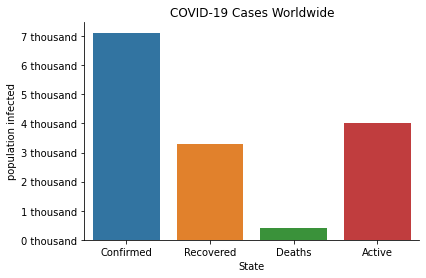

In [ ]:
ax = plt.subplot()
sns.barplot(x='State', y='Number of cases', data=cases_worldwide)
plt.title('COVID-19 Cases Worldwide')
#plt.xlabel('cases category-wise')
plt.ylabel('population infected')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(np.arange(0,8000000,1000000),['{} thousand'.format(i) for i in np.arange(0,8,1)]);

In [ ]:
#china compared to the rest of the wprld
china_cases = df_agg[df_agg['Country']=='China']
china_cases.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
36,2020-01-22,China,548,28,17,503
224,2020-01-23,China,643,30,18,595
412,2020-01-24,China,920,36,26,858
600,2020-01-25,China,1406,39,42,1325
788,2020-01-26,China,2075,49,56,1970


<Figure size 1440x144 with 0 Axes>

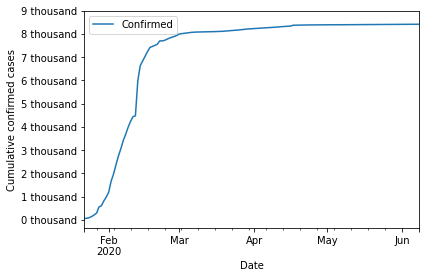

In [ ]:
plt.figure(figsize=(20,2));
china_cases.plot.line(x='Date' , y='Confirmed');
plt.ylabel("Cumulative confirmed cases");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(np.arange(0,100000,10000),['{} thousand'.format(i) for i in np.arange(0,10,1)]);

<Figure size 1440x144 with 0 Axes>

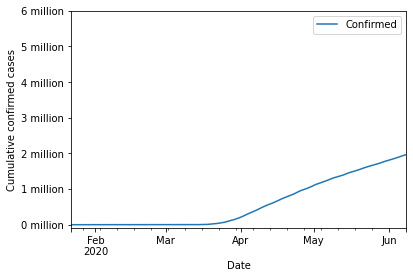

In [ ]:
plt.figure(figsize=(20,2));
df_agg[df_agg['Country']== 'US'].plot.line(x='Date' , y='Confirmed');
plt.ylabel("Cumulative confirmed cases");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(np.arange(0,7000000,1000000),['{} million'.format(i) for i in np.arange(0,7,1)]);

**We extract 8 countries from the main dataframe to work on them.**

Countries:
{Germany, USA, Italy, India, China, S. Korea, UK, Iran}


In [ ]:
select_countries = ['Germany', 'US', 'Italy', 'India','China','Korea, South','United Kingdom','Iran']
df_countries_date = df_agg[df_agg["Country"].isin(select_countries)]
df_countries_date.sample(5)

,Date,Country,Confirmed,Recovered,Deaths,Active
4029,2020-02-12,Iran,0,0,0,0
3653,2020-02-10,Iran,0,0,0,0
13760,2020-04-04,China,82543,76946,3330,2267
6082,2020-02-23,Germany,16,14,0,2
21889,2020-05-17,Iran,120198,94464,6988,18746


In [ ]:
#WE need to know the numbers of null and unknown values 
df_countries_date.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
Active       0
dtype: int64

In [ ]:
df_countries_date['Confirmed']

36           548
66             0
79             0
81             0
85             0
          ...   
26025     173832
26029     235278
26035      11852
26118    1960897
26122     288834
Name: Confirmed, Length: 1112, dtype: int64

In [ ]:
df_countries_date.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered,Active
Country,,,,
China,9965614,444951,7808698,1711965
Germany,11437797,431204,8267404,2739189
India,5401757,160960,2197056,3043741
Iran,7830564,456237,5577291,1797036
Italy,14931296,2004252,6421064,6505980
"Korea, South",1009061,19510,672561,316990
US,80915058,4602053,14391645,61921360
United Kingdom,12781606,1840313,59539,10881754


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Total numbers of infected people divided in 4 categories')

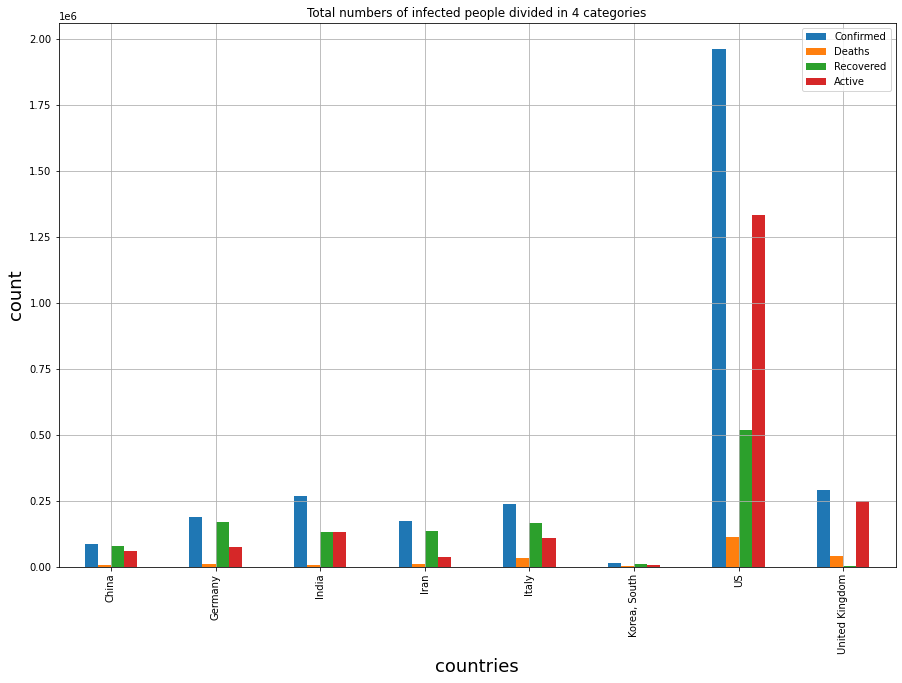

In [ ]:
df_countries_date.groupby('Country')['Confirmed','Deaths','Recovered','Active'].max().plot.bar(grid=True , figsize=(15,10));
plt.xlabel('countries' , size = 18)
plt.ylabel('count' , size = 18)
plt.title('Total numbers of infected people divided in 4 categories')
#plt.yticks(np.arange(0,95000000,5000000),['{} Thousand'.format(i) for i in np.arange(0,95,5)]);

In [ ]:
first_date_filter = df_countries_date[(df_countries_date['Confirmed'] > 0 ) | (df_countries_date['Deaths'] > 0 ) ]

In [ ]:
first_date_filter

,Date,Country,Confirmed,Recovered,Deaths,Active
36,2020-01-22,China,548,28,17,503
91,2020-01-22,"Korea, South",1,0,0,1
174,2020-01-22,US,1,0,0,1
224,2020-01-23,China,643,30,18,595
279,2020-01-23,"Korea, South",1,0,0,1
...,...,...,...,...,...,...
26025,2020-06-08,Iran,173832,136360,8351,29121
26029,2020-06-08,Italy,235278,166584,33964,34730
26035,2020-06-08,"Korea, South",11852,10589,274,989
26118,2020-06-08,US,1960897,518522,110990,1331385


In [ ]:
#find the first date of infection in each country
df_first_date = first_date_filter.groupby('Country').min()['Date'].reset_index()
df_first_date.sort_values(by = 'Date' , ascending=True )

,Country,Date
0,China,2020-01-22
5,"Korea, South",2020-01-22
6,US,2020-01-22
1,Germany,2020-01-27
2,India,2020-01-30
4,Italy,2020-01-31
7,United Kingdom,2020-01-31
3,Iran,2020-02-19


In [ ]:
#create a new Dataframe in order to have numbers of confirmed people for each country at their first date
df_first_date.merge(df_countries_date , on=['Date' , 'Country'] , how='left' )

,Country,Date,Confirmed,Recovered,Deaths,Active
0,China,2020-01-22,548,28,17,503
1,Germany,2020-01-27,1,0,0,1
2,India,2020-01-30,1,0,0,1
3,Iran,2020-02-19,2,0,2,0
4,Italy,2020-01-31,2,0,0,2
5,"Korea, South",2020-01-22,1,0,0,1
6,US,2020-01-22,1,0,0,1
7,United Kingdom,2020-01-31,2,0,0,2


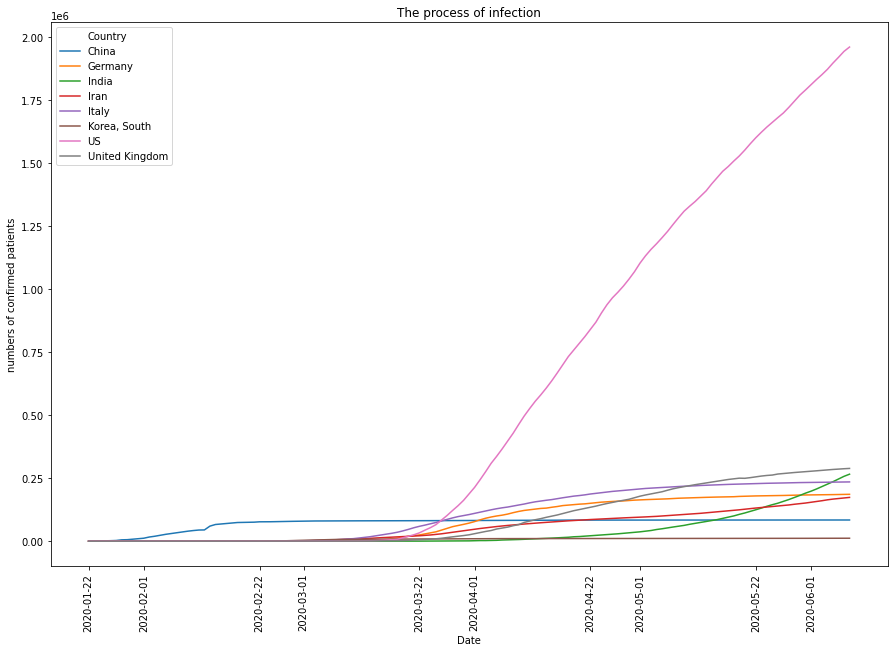

In [ ]:
plt.figure(figsize=(15,10))
#date = df_countries_date['Date']
sns.lineplot( x='Date' , y= 'Confirmed' ,hue= 'Country' , data=df_countries_date);
plt.xlabel('Date')
plt.ylabel('numbers of confirmed patients')
plt.title('The process of infection')
#plt.ystick
#plt.xticks(['2020-01-01' , '2020-04-01'])
plt.xticks(rotation=90);

In [ ]:
#To convert Date values from string to datetime >>> DataFrame.to_datetime()
#countries_date['date'] = pd.to_datetime(countries_date['date'])
#countries_date


In [ ]:
df_ref = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data//reference.csv')
df_ref.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [ ]:
df_ref.isna().sum()

UID                 0
iso2                3
iso3                2
code3               2
FIPS              719
Admin2            760
Province_State    188
Country_Region      0
Lat               142
Long_             142
Combined_Key        0
Population        137
dtype: int64

In [ ]:
#Using only data we need
df_countries_ref=df_ref[df_ref["Country_Region"].isin(select_countries)];
#cleaning column names
df_countries_ref.rename(columns={'Province_State':'State','Country_Region':'Country','Long_':'long','iso3':'iso'}, inplace=True);
#dropping some columns that we don't need
df_countries_ref = df_countries_ref.drop(['FIPS','Admin2','iso2','code3','UID','Combined_Key','Lat','long'], axis=1 );

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_countries_ref.sample(5)

,iso,State,Country,Population
1910,USA,Kentucky,US,8869.0
2014,USA,Louisiana,US,69830.0
1706,USA,Iowa,US,10689.0
3521,USA,Texas,US,14760.0
2863,USA,North Carolina,US,56177.0


In [ ]:
#replace NaN values with 0
df_countries_ref[['State']].fillna(0)

,State
154,0
155,Baden-Wurttemberg
156,Bayern
157,Berlin
158,Brandenburg
...,...
4016,Wyoming
4017,Wyoming
4018,Wyoming
4019,Wyoming


In [ ]:
#conacat  df1 and df2 
#countries_info = pd.concat([df2, df1], axis=1)
countries_info=df_countries_date.merge(df_countries_ref , on='Country' , how='left')

In [ ]:
df_countries_grouped = countries_info.groupby(['Date' ,'Country'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index
df_countries_grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<bound method DataFrame.reset_index of                             Confirmed     Deaths   Recovered      Active
Date       Country                                                      
2020-01-22 China                18632        578         952       17102
           Germany                  0          0           0           0
           India                    0          0           0           0
           Iran                     0          0           0           0
           Italy                    0          0           0           0
...                               ...        ...         ...         ...
2020-06-08 Iran                173832       8351      136360       29121
           Italy              5176116     747208     3664848      764060
           Korea, South         11852        274       10589         989
           US              6518021628  368930760  1723567128  4425523740
           United Kingdom     4621344     650880       20080     3950384

[1112 rows 

In [ ]:
df_time_series=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')
df_time_series.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [ ]:
df_time_series=df_time_series.drop(['Lat','Long'],axis=1)
df_time_series.columns=(['Date', 'Country', 'State', 'Confirmed', 'Recovered', 'Deaths'])
df_time_series.head()

,Date,Country,State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,0.0,0.0,0.0


**Understanding testing data**

In [ ]:
 df_owid=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
 df_owid.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
10581,ISR,Asia,Israel,2020-02-25,2,0,0,0,0.231,0.000,0.000,0.000,715.0,108.0,0.083,0.012,50.0,0.006,tests performed,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.320,0.5,93.320,6.74,15.4,35.4,NaN,2.99
14580,MMR,Asia,Myanmar,2020-06-04,234,1,6,0,4.301,0.018,0.110,0.000,33587.0,1886.0,0.617,0.035,1442.0,0.027,samples tested,NaN,54409794.0,81.721,29.1,5.732,3.120,5591.597,6.4,202.104,4.61,6.3,35.2,79.287,0.90
20348,SYR,Asia,Syria,2020-05-20,58,0,3,0,3.314,0.000,0.171,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63,17500657.0,NaN,21.7,NaN,2.577,NaN,NaN,376.264,NaN,NaN,NaN,70.598,1.50
8138,GHA,Africa,Ghana,2020-05-14,5408,281,24,2,174.042,9.043,0.772,0.064,171642.0,3938.0,5.524,0.127,3099.0,0.100,people tested,62.04,31072945.0,126.719,21.1,3.385,1.948,4227.630,12.0,298.245,4.97,0.3,7.7,41.047,0.90
19589,LKA,Asia,Sri Lanka,2020-02-08,1,0,0,0,0.047,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,21413250.0,341.955,34.1,10.069,5.331,11669.077,0.7,197.093,10.68,0.3,27.0,NaN,3.60


In [ ]:
#Segregationg and using only data we require in new dataframe df_testing
#selecting countries
select_countries_2 = ['Germany', 'United States', 'Italy', 'India','China','South Korea','United Kingdom','Iran']
df_testing=df_owid[df_owid["location"].isin(select_countries_2)]
#removin extra columns
df_testing = df_testing.drop(['handwashing_facilities','extreme_poverty','stringency_index','total_cases_per_million',
                              'new_cases_per_million','total_deaths_per_million','new_deaths_per_million','new_tests_smoothed','new_tests_smoothed_per_thousand','population_density','gdp_per_capita','cvd_death_rate'], axis=1 );
df_testing.rename(columns={'iso_code':'iso'}, inplace=True);
df_testing.sample(5)

,iso,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,median_age,aged_65_older,aged_70_older,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand
21708,GBR,Europe,United Kingdom,2020-02-14,9,0,0,0,NaN,NaN,NaN,NaN,NaN,6.788600e+07,40.8,18.517,12.527,4.28,20.0,24.7,2.54
10690,ITA,Europe,Italy,2020-01-02,0,0,0,0,NaN,NaN,NaN,NaN,NaN,6.046183e+07,47.9,23.021,16.240,4.78,19.8,27.8,3.18
21768,GBR,Europe,United Kingdom,2020-04-14,88621,4342,13029,744,NaN,NaN,NaN,NaN,NaN,6.788600e+07,40.8,18.517,12.527,4.28,20.0,24.7,2.54
9650,IND,Asia,India,2020-01-11,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1.380004e+09,28.2,5.989,3.414,10.39,1.9,20.6,0.53
21959,USA,North America,United States,2020-05-12,1347916,18117,80684,1156,9724879.0,NaN,29.38,NaN,tests performed,3.310026e+08,38.3,15.413,9.732,10.79,19.1,24.6,2.77


In [ ]:
df_testing=df_testing.fillna(0)
df_testing.sample(5)

,iso,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,median_age,aged_65_older,aged_70_older,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand
10057,IRN,Asia,Iran,2020-04-09,64586,1997,3993,121,231393.0,10418.0,2.755,0.124,tests performed,8.399295e+07,32.4,5.440,3.182,9.59,0.8,21.1,1.50
4538,CHN,Asia,China,2020-05-30,84123,17,4638,0,0.0,0.0,0.000,0.000,0,1.439324e+09,38.7,10.641,5.929,9.74,1.9,48.4,4.34
9738,IND,Asia,India,2020-04-09,5734,540,166,17,144910.0,16991.0,0.105,0.012,samples tested,1.380004e+09,28.2,5.989,3.414,10.39,1.9,20.6,0.53
19296,KOR,Asia,South Korea,2020-05-16,11037,19,262,2,740645.0,13898.0,14.446,0.271,people tested,5.126918e+07,43.4,13.914,8.622,6.80,6.2,40.9,12.27
9799,IND,Asia,India,2020-06-09,266598,9987,7466,331,4916116.0,141682.0,3.562,0.103,samples tested,1.380004e+09,28.2,5.989,3.414,10.39,1.9,20.6,0.53


In [ ]:
df_testing['date'] = pd.to_datetime(df_testing['date'])

In [ ]:
df_testing['week_date']=[your_date - datetime.timedelta(days=your_date.isoweekday() % 7) for your_date in df_testing.date]

In [ ]:
df_test_weekly=df_testing.groupby(['location','week_date'])['total_tests','total_cases','new_tests','new_cases','new_deaths','total_deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#df_testing.groupby(['location','week_date'])['new_tests','new_cases'].sum().reset_index()

In [ ]:
df_test_weekly['conf_test']=df_test_weekly['new_cases']/df_test_weekly['new_tests']

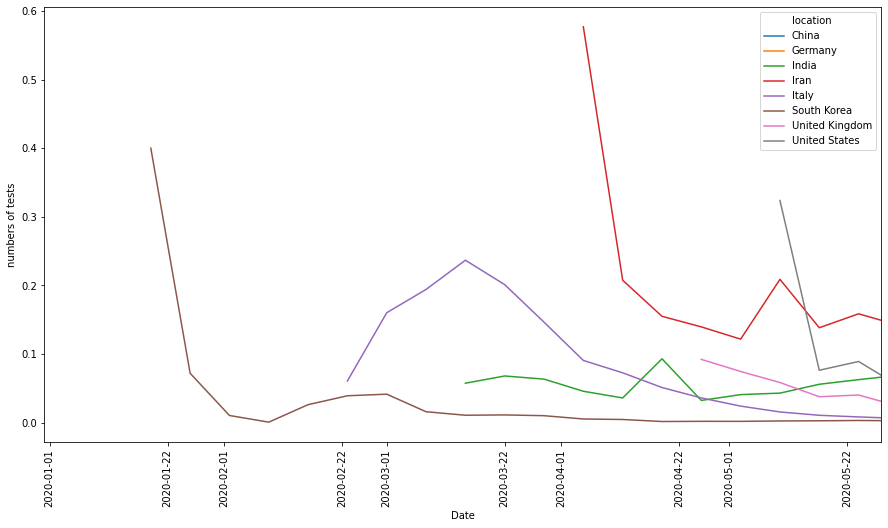

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot( x='week_date' , y= 'conf_test' ,hue= 'location', data=df_test_weekly);
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-05-28'))
plt.ylabel('numbers of tests')
plt.xticks(rotation=90);

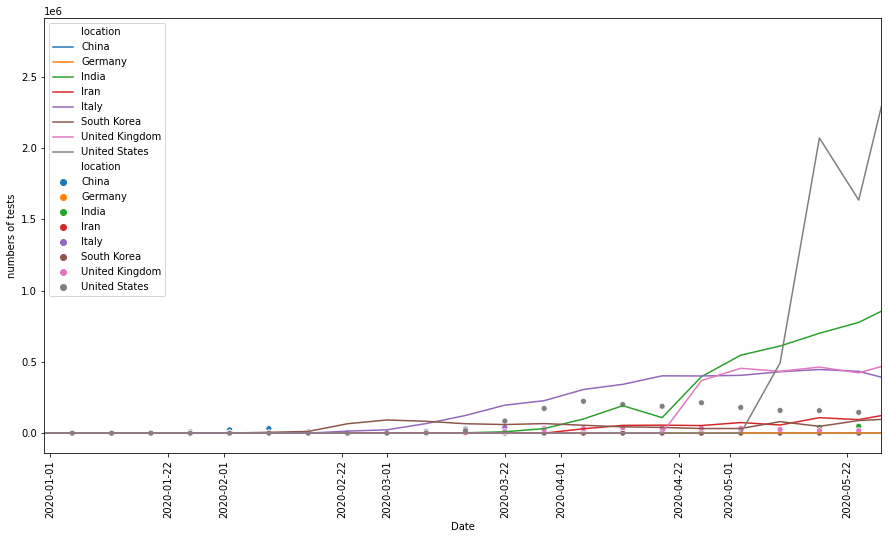

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot( x='week_date' , y= 'new_tests' ,hue= 'location', data=df_test_weekly);
sns.scatterplot( x='week_date' , y= 'new_cases' ,hue= 'location', data=df_test_weekly);
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-05-28'))
plt.ylabel('numbers of tests')
plt.xticks(rotation=90);

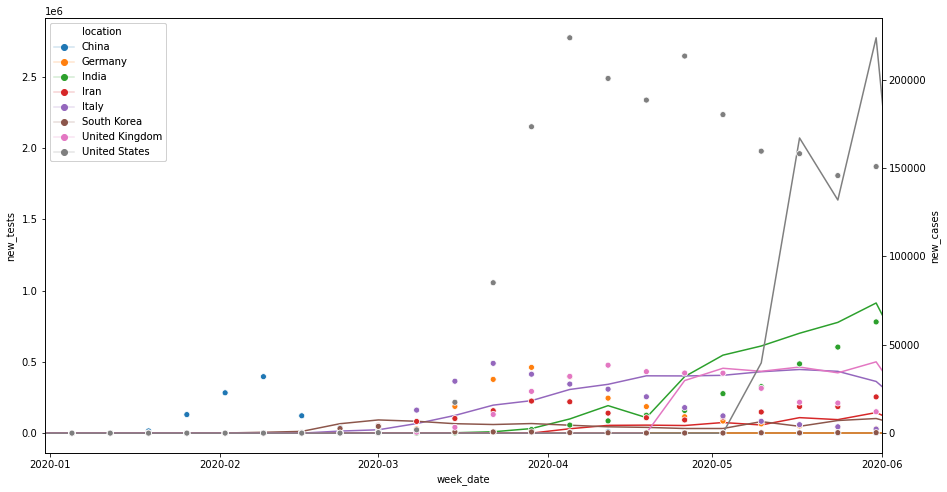

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot( x='week_date' , y= 'new_tests' ,hue= 'location', data=df_test_weekly);
ax2=ax1.twinx()
sns.scatterplot( x='week_date' , y= 'new_cases' ,hue= 'location', data=df_test_weekly, ax=ax2);
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-06-01'))
#plt.ylabel('numbers of tests')
plt.xticks(rotation=90);

((array([737425., 737456., 737485., 737516., 737546., 737577.]),
  <a list of 6 Text major ticklabel objects>),)

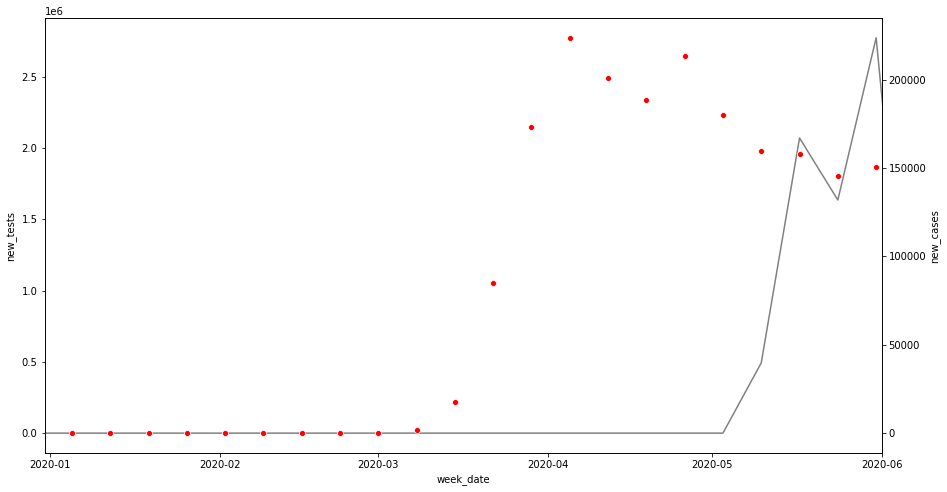

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot( x='week_date' , y= 'new_tests', data=df_test_weekly[df_test_weekly['location']=='United States'], color='gray');
ax2=ax1.twinx()
sns.scatterplot( x='week_date' , y= 'new_cases', data=df_test_weekly[df_test_weekly['location']=='United States'], ax=ax2, color='red');
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-06-01'))
#plt.ylabel('numbers of tests')
plt.xticks(rotation=90),

((array([737425., 737456., 737485., 737516., 737546., 737577.]),
  <a list of 6 Text major ticklabel objects>),)

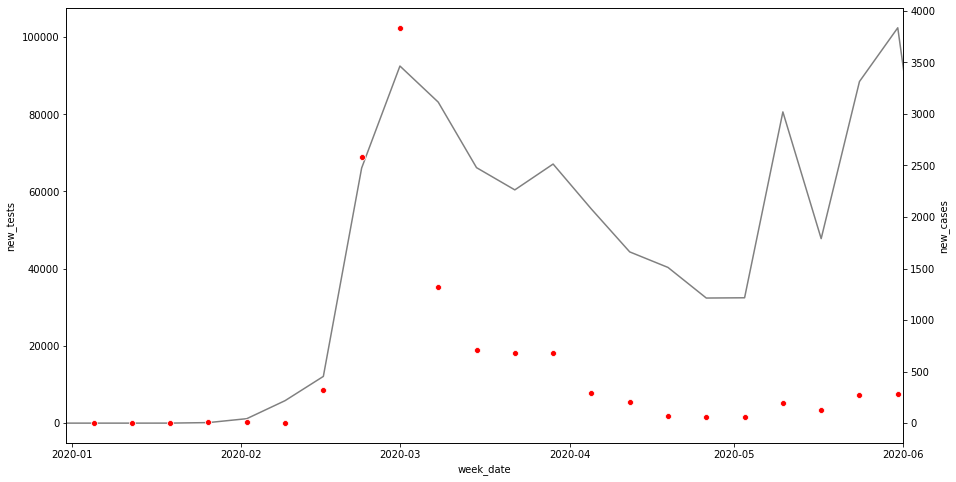

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot( x='week_date' , y= 'new_tests', data=df_test_weekly[df_test_weekly['location']=='South Korea'], color='gray');
ax2=ax1.twinx()
sns.scatterplot( x='week_date' , y= 'new_cases', data=df_test_weekly[df_test_weekly['location']=='South Korea'], ax=ax2, color='red');
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-06-01'))
#plt.ylabel('numbers of tests')
plt.xticks(rotation=90),

((array([737425., 737456., 737485., 737516., 737546., 737577.]),
  <a list of 6 Text major ticklabel objects>),)

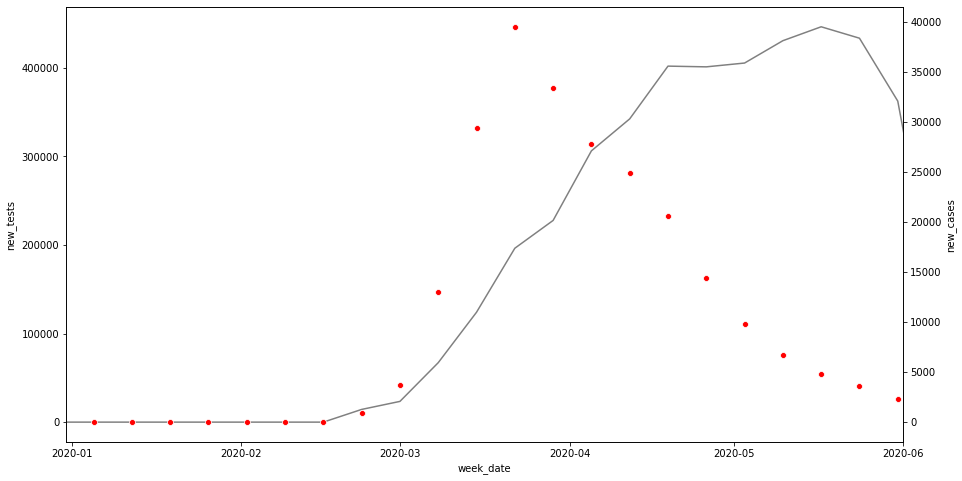

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot( x='week_date' , y= 'new_tests', data=df_test_weekly[df_test_weekly['location']=='Italy'], color='gray');
ax2=ax1.twinx()
sns.scatterplot( x='week_date' , y= 'new_cases', data=df_test_weekly[df_test_weekly['location']=='Italy'], ax=ax2, color='red');
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-06-01'))
#plt.ylabel('numbers of tests')
plt.xticks(rotation=90),

((array([737425., 737456., 737485., 737516., 737546., 737577.]),
  <a list of 6 Text major ticklabel objects>),)

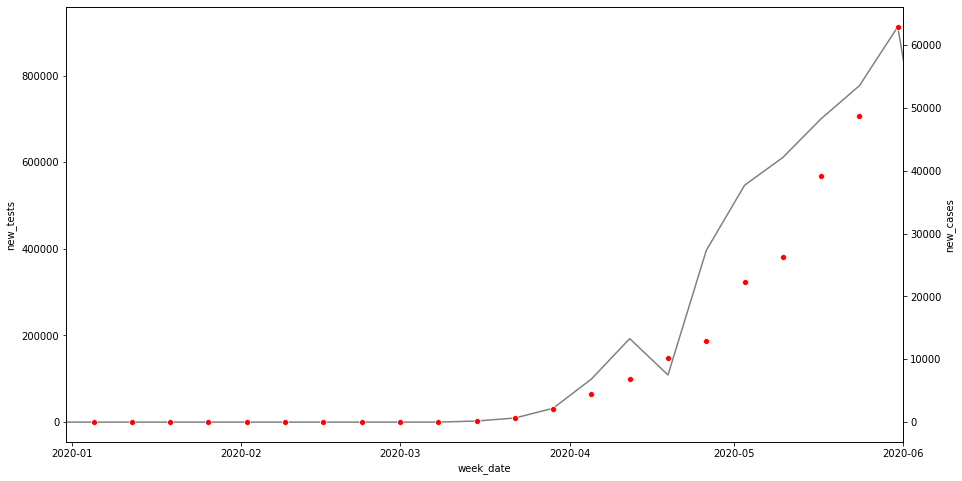

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.lineplot( x='week_date' , y= 'new_tests', data=df_test_weekly[df_test_weekly['location']=='India'], color='gray', legend='full');
ax2=ax1.twinx()
sns.scatterplot( x='week_date' , y= 'new_cases', data=df_test_weekly[df_test_weekly['location']=='India'], ax=ax2, color='red', legend='full');
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2019-12-31'),pd.to_datetime('2020-06-01'))
#plt.ylabel('numbers of tests')
plt.xticks(rotation=90),